# SBYC Snowbird Feb 8th, 2020




West Point Wind

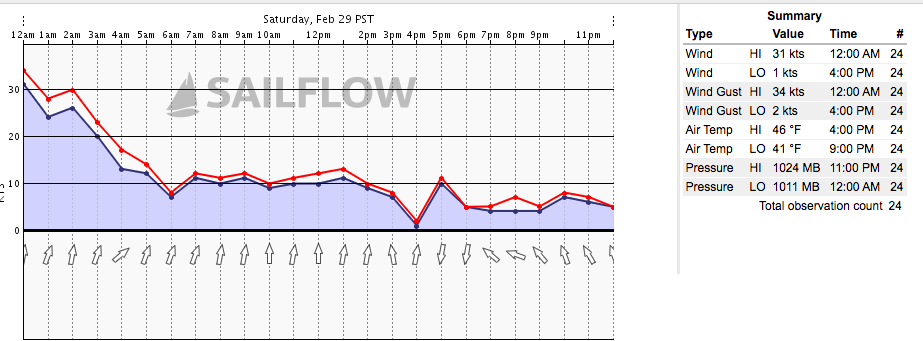


West Point Tides:

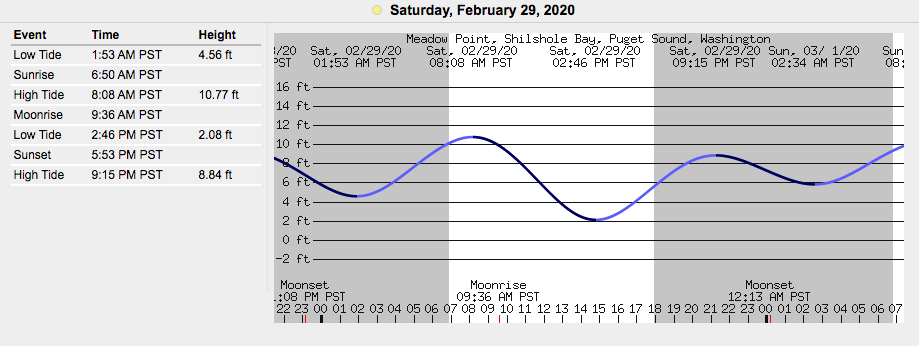


Golden Gardens Wind

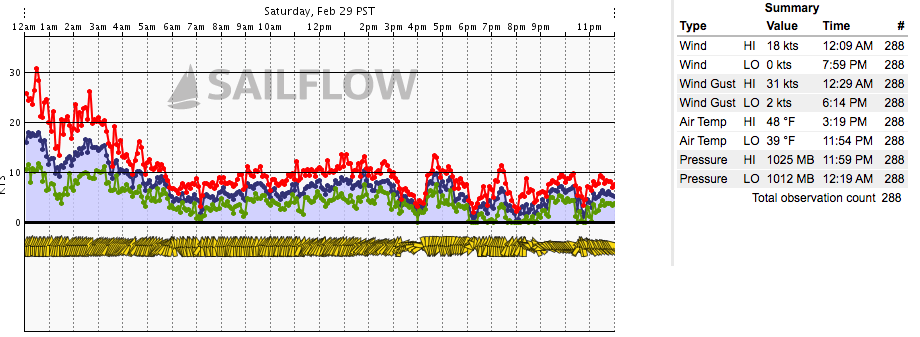



In [1]:
# Load some libraries
%matplotlib notebook
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})

import numpy as np

# These are libraries written for RaceAnalysis
import global_variables
G = global_variables.init_seattle()
import race_logs
import process as p
import analysis as a
import chart as c

In [2]:
pwd

'/Users/viola/GDriveBV/Sailboat/Code/Python/sailing'

In [3]:
dfs, races, big_df = race_logs.read_dates(["2020-02-29"])
df = dfs[0]

Session from 2020-02-29 18:24:43.060000, 145790 rows, 4.049444444444444 hours.


In [6]:
big_df.row_times

0           2020-02-29 10:24:43.060000-08:00
1        2020-02-29 10:24:43.159996090-08:00
2        2020-02-29 10:24:43.259992180-08:00
3        2020-02-29 10:24:43.359988270-08:00
4        2020-02-29 10:24:43.459984360-08:00
                         ...                
145780   2020-02-29 14:27:41.095326722-08:00
145781   2020-02-29 14:27:41.195269545-08:00
145782   2020-02-29 14:27:41.295212368-08:00
145783   2020-02-29 14:27:41.395155191-08:00
145784   2020-02-29 14:27:41.495098014-08:00
Name: row_times, Length: 145785, dtype: datetime64[ns, US/Pacific]

<IPython.core.display.Javascript object>


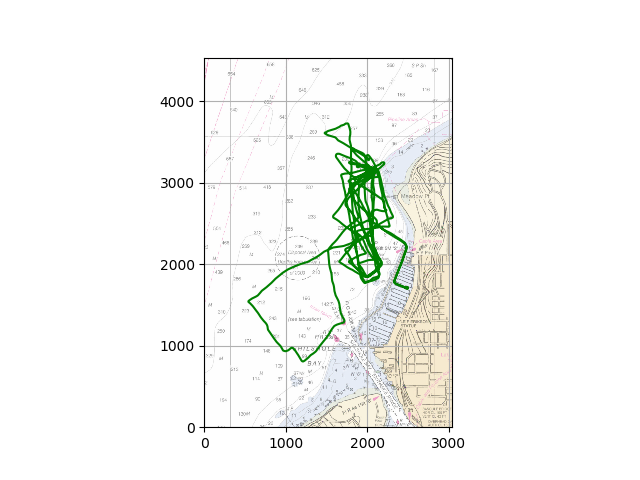

In [5]:
chart = c.plot_chart(df)
c.draw_track(df, chart, color='green')

In [2]:
pwd

'/Users/viola/GDriveBV/Sailboat/Code/Python/sailing'

In [3]:
# Race data is stored in these files.
example = DictClass(log='2020-02-08_10:23.pd.gz', doc='Snowbird #4.', begin=32000, end=130010, twd=True)

print(f"Reading and analyzing {example.doc} from {example.log}")
raw_df = p.read_sail_log(example.log, discard_columns=True, skip_dock_only=False, trim=True, 
                     path=G.DATA_DIRECTORY, cutoff=0.3)

# Let's grab the times for the race.
raw_df['tide'] = tides.tides_at(raw_df.row_times)

# Trim the raw log, which typically runs from the dock to the dock.
df = raw_df.loc[example.begin : example.end]

Reading and analyzing Snowbird #4. from 2020-02-08_10:23.pd.gz
Session from 2020-02-08 18:23:28.070000, 141790 rows, 4.152222222222222 hours.


In [4]:
begin_time = df.row_times.iloc[0].strftime('%B %d, %Y, %r')
end_time = df.row_times.iloc[-1].strftime('%r')
print(f"Trimmed log runs from {begin_time} to {end_time}")

Trimmed log runs from February 08, 2020, 11:15:58 AM to 02:07:27 PM


<IPython.core.display.Javascript object>


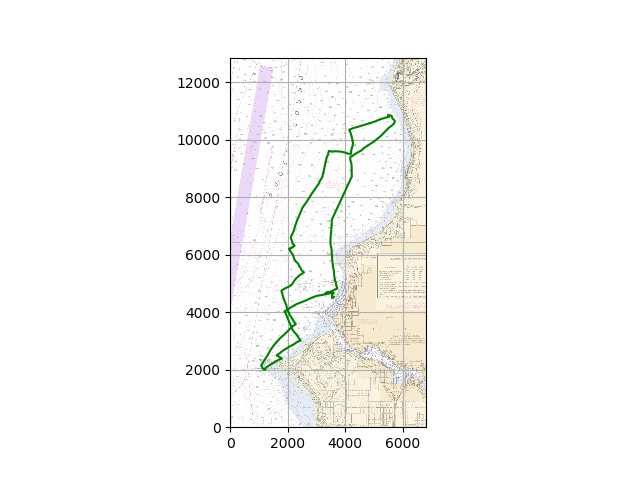

In [5]:
chart = c.plot_chart(df)
c.draw_track(df, chart, color='green')

<IPython.core.display.Javascript object>


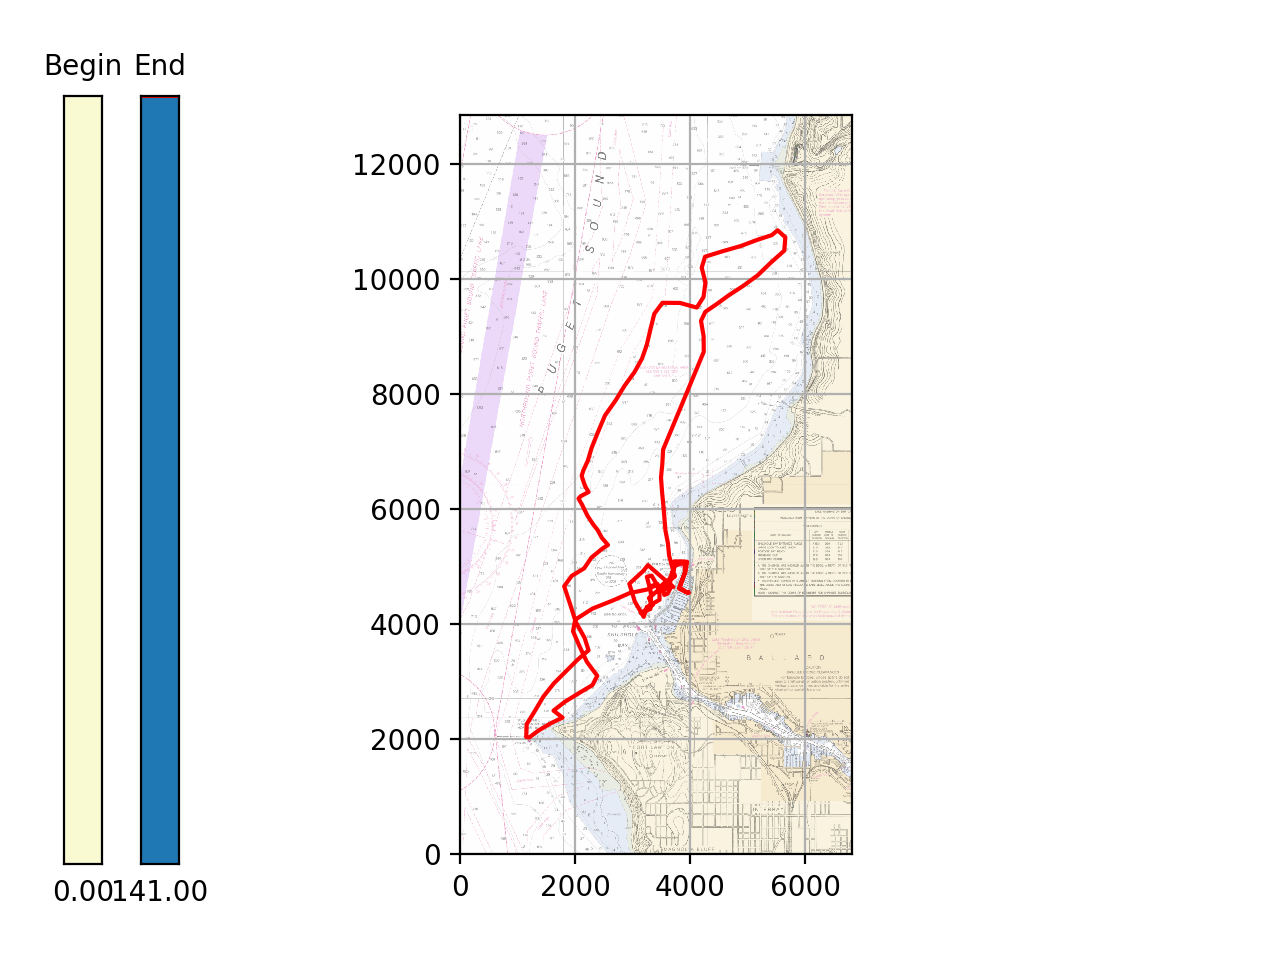

In [37]:
# This a bit fancier and can be used to interactively trim the race.  
# Note, it freezes up sometimes.  If it does, you can re-evaluate the expression.
ch = c.plot_track(raw_df, skip=1000)

In [27]:
# ch will hold the values of the sliders above.  After you are done trimming away the all but 
# the race, then you can take the ends and acess them like this
begin, end = ch.begin, ch.end
print(f"We have trimmed the race from {begin} to {end}")

# These numbers can be used to trim the raw log (as we did above), or to focus in on a key 
# section of the race.

wdf = df.loc[begin : end]

We have trimmed the race from 46010 to 54010


<IPython.core.display.Javascript object>


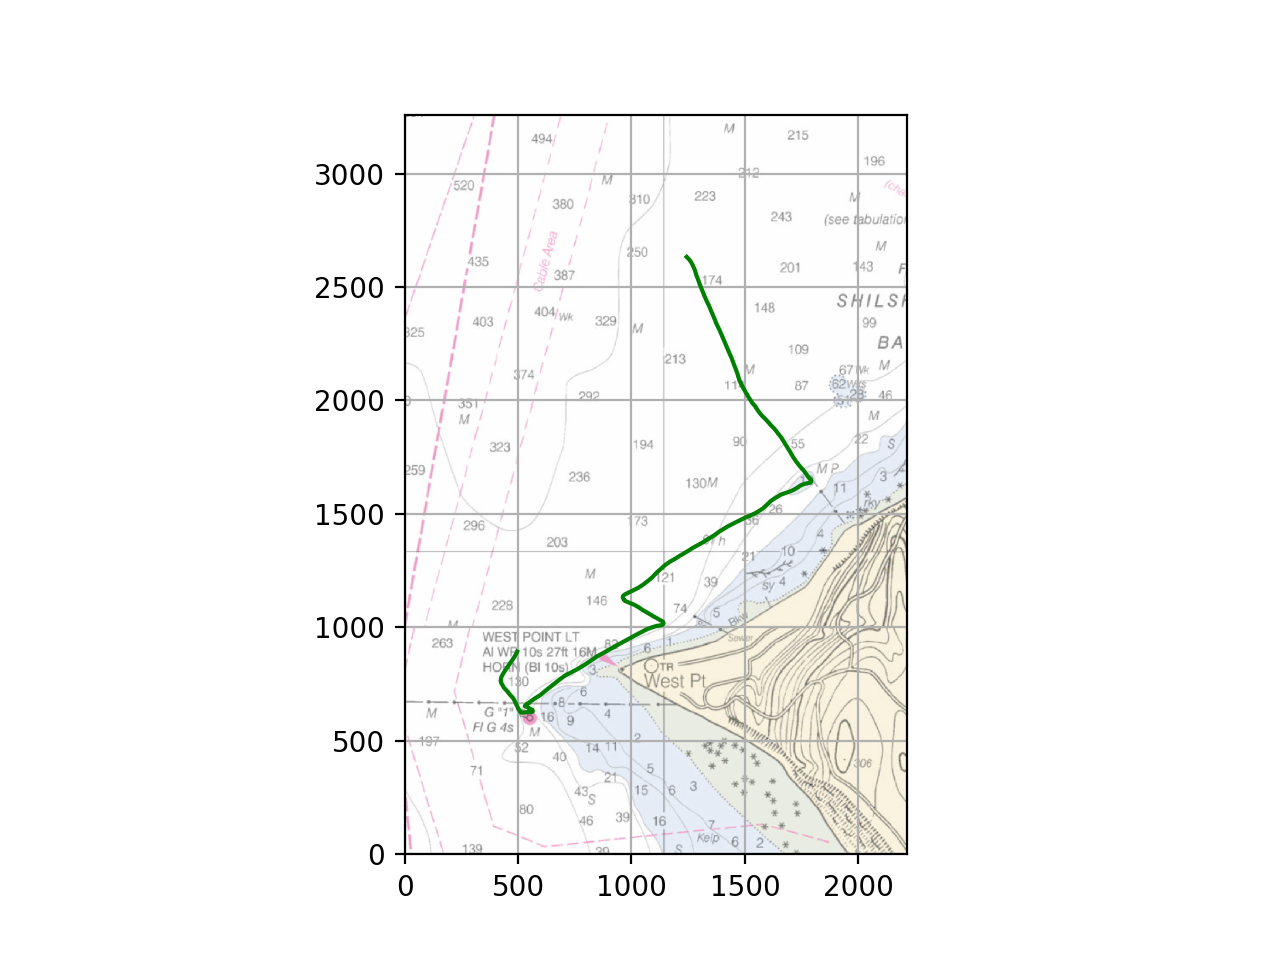

In [51]:
# Or just save a previous begin/end time.
begin, end = 38000, 53000
begin, end = 39510, 53010
wdf = df.loc[begin : end]

chart = c.plot_chart(wdf)
c.draw_track(wdf, chart, color='green')

<IPython.core.display.Javascript object>


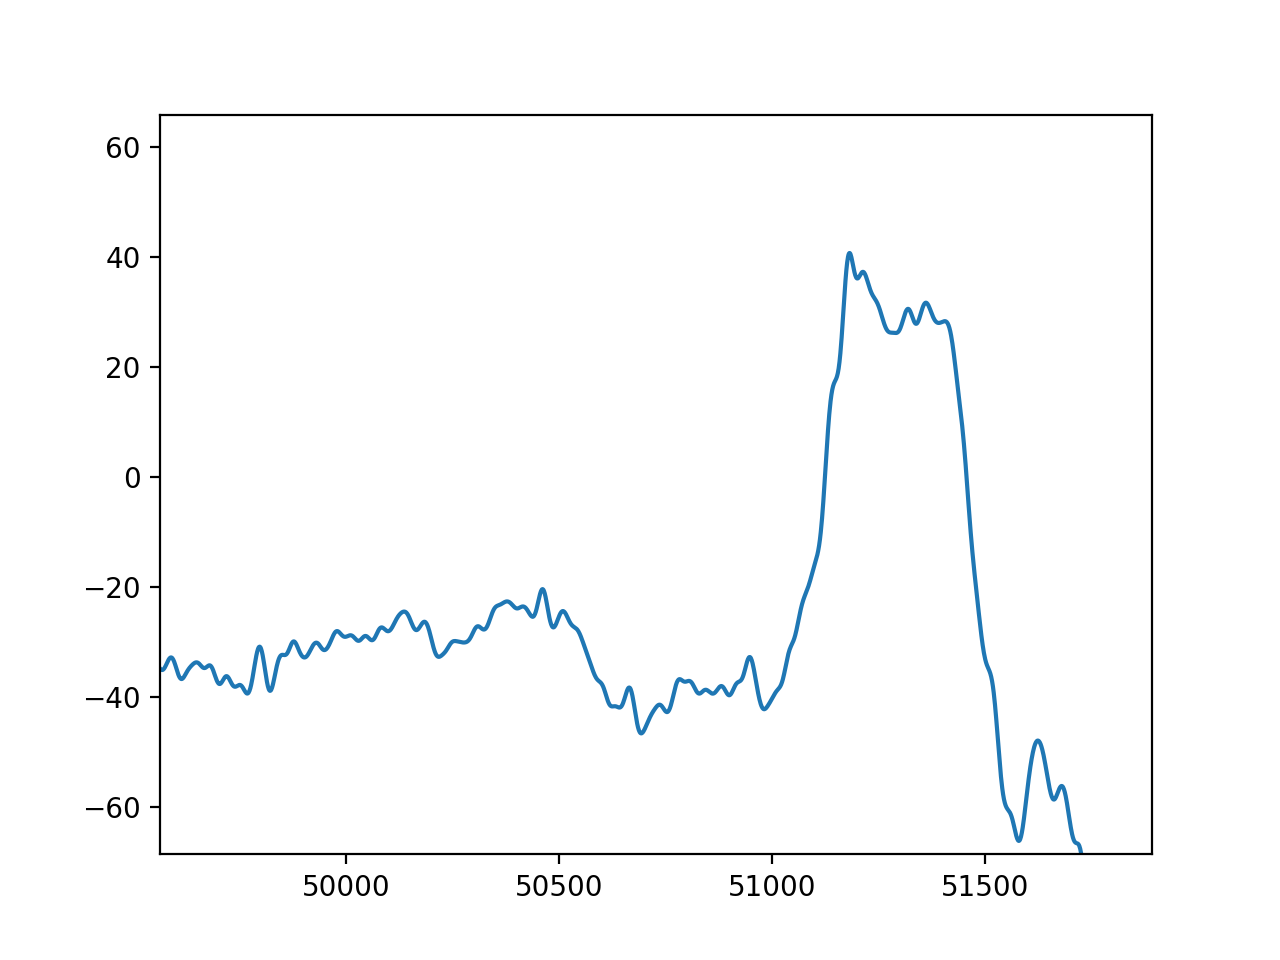

In [50]:
plt.figure()
wdf.awa.plot()

2020-02-08 11:41:21.869960489-08:00 2020-02-08 11:50:59.242969461-08:00


<IPython.core.display.Javascript object>


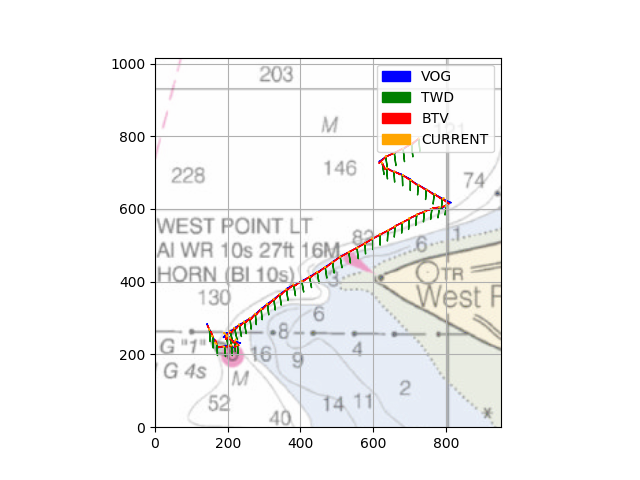

In [36]:
race_slice = slice(example.begin, example.end)
race_slice = slice(begin, end)
wdf = df.loc[race_slice]
print(wdf.row_times.min(), wdf.row_times.max())
ch = c.show_boat_arrows(df, race_slice, dt_seconds=10, skip=1)


In [32]:
wdf.row_times

46510   2020-02-08 11:41:21.869960489-08:00
46511   2020-02-08 11:41:21.974937400-08:00
46512   2020-02-08 11:41:22.079914310-08:00
46513   2020-02-08 11:41:22.184891221-08:00
46514   2020-02-08 11:41:22.289868132-08:00
                        ...                
52006   2020-02-08 11:50:58.823061818-08:00
52007   2020-02-08 11:50:58.928038729-08:00
52008   2020-02-08 11:50:59.033015640-08:00
52009   2020-02-08 11:50:59.137992550-08:00
52010   2020-02-08 11:50:59.242969461-08:00
Name: row_times, Length: 5501, dtype: datetime64[ns, US/Pacific]

In [ ]:
import tides

plt.figure()
ttt = tides.tides_at(odf.row_times)
plt.plot(odf.row_times, ttt)

In [ ]:
df.variation

In [ ]:
wdf.twd

In [ ]:
c.quick_plot(df.row_times, (df.twd, 20*df.tws))



In [ ]:
wdf.row_times